#KNN ->Vecinos mas cercanos 

Se usa para problemas de clasificacion 

invididos parecidos son los mas cercanos 

Clasifica mirando sus caracteristicas y lo define al los vecinos mas cercanos parecidos 

Toca tener cuidado con los datos "Aja y tu que ?"

K debe ser impar , se puede poner par pero debe definir un criterio de desempate 


Se debe tener gran cantidad de datos en train para decir que si esta entrenando bien

y con el test es para ver si el modelo esta generalizando 

 Vamos a usar sckit learn,

 aqui tiene casi todos los modelos de maching learing.

 vamos a usar el dataset de toy 

In [17]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
# Usamos de esta manera 
# modelo=modelo()
#modelo.fit(Train)
#modelo.predict(test)
#modelo.score()# estas son las metricas 

In [19]:
datasets=datasets.load_breast_cancer() # que debemos saber ? , mirar la documentacion 

In [20]:
x= datasets.data[:,0:-1] 
#x= datasets.data[:,5:7] # simpre se debe crear 
y= datasets.target      # variable objetivo 

In [7]:
print(datasets.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [21]:
modelo = KNeighborsClassifier() # Se crea el modelo , es decir instanciamos el modelo, sin ningun dato. 

In [22]:
modelo.fit(x,y) # Aqui entreno el modelo con los datos que le pase.

KNeighborsClassifier()

In [23]:
y_predict=modelo.predict(x)

In [16]:
modelo.score(x,y) # aqui miramos las metricas 

0.8945518453427065

In [24]:
from sklearn.model_selection import train_test_split # aqui partimos los datos 

Clase 01/06/2024

KNN

Las asignaciones son la k que mira los vecionos que esta cerca

Como escogemos K ? la version mas artesanal es escoger varios y probar 

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y) # esto es para dividir y guardar en los datos de entrenamiento y testeto 
# que es stratify -> primero valide las clases , organize la cantidad de los datos iguales en train y test . es para que representa la relacion. 

In [26]:
# Vamos a crear un vector 
error=[] # probando los diferentes modelos. 
i_p=[]
for i in range(1,20):
    i_p.append(i)
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train) # Entreno en modelo 
    y_pred=knn.predict(x_test) # lo pruebo con los datos de testeo 
    error.append(np.sum(y_pred!=y_test))
error



[6, 8, 6, 6, 4, 5, 5, 5, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [27]:
i_p

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

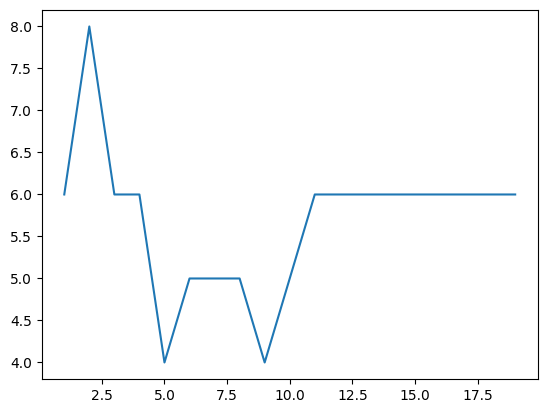

In [28]:
plt.plot(i_p,error)
plt.show()

Si tenemos muchos datos no se puede hacer esto, debido al costo de computacional.

Validacion Cruzada 

In [ ]:
# Consiste en tener el conjunto de datos , y lo que se va hacer es dividir en 3 y la primera corrida es utilizar los dos primeros y el ultimo para probar 
# y vamos a tener una metrica de rendimiento 
# en la segunda corrida, es entrenar , probar y otra vez entrenar y saco metrica 
# en la ultima es probar y entrenar y entrenar. 
# el modelo es el mismo , que es lo que va a pasar sacar el promedo y ver como se esta comportando el modelo. una conclusion mas certera de que si esta 
# generalizando 

Estos algoritmos depende metricas de distancia , son muy sensibles a rago de las variables , en regresion lineal los pesos son sensible 

Para evitar esos errores , se debe hacer la normalizacion de las variables , que esten todas en rangos que permitan. llevar a mediana cero y estandar  se usa el StandardScaler()

NAIVE BAYES 

se basa en el teorema de bayes , y usa todos los atributos. por que considera que todos los atributos son importantes y que los tributos son estadisticamente independiente 

y se queda con la probabilidad mas alta para clasificar.

Tine porblema de que si la probabilidad es 0 , entonces toca realizar , agregar 1 la cuenta para cada combinacion valor-clase  queda sobre 1/el valor de datos 

En las variables numericas , el asume valores distribucion normal 